In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import itertools
import joblib

In [2]:
# load the data
data = pd.read_csv('data.csv')

In [3]:
# load the data
new_df = pd.read_csv('new_df.csv')

In [4]:
# load the data
df_test_over = pd.read_csv('df_test_over.csv')

In [5]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
# split the undersampled data into train and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(new_df.drop('Class', axis=1), new_df['Class'], test_size=0.2, random_state=42)

In [7]:
# instantiate and train the model
model_under = XGBClassifier()
model_under.fit(X_train_under,y_train_under)
y_under_pred = model_under.predict(X_test_under)

print("\n========= Under Sampled Data Accuracy using XGBClassifier==============\n")
print("Accuracy Score ", accuracy_score(y_under_pred,y_test_under)) 
print ("\n =====Confusion Matrix ======\n")


========= Under Sampled Data Accuracy using XGBClassifier==============

Accuracy Score  0.9473684210526315

 =====Confusion Matrix ======



Confusion matrix
[[93  5]
 [ 5 87]]
Confusion matrix
[[98  0]
 [ 0 92]]


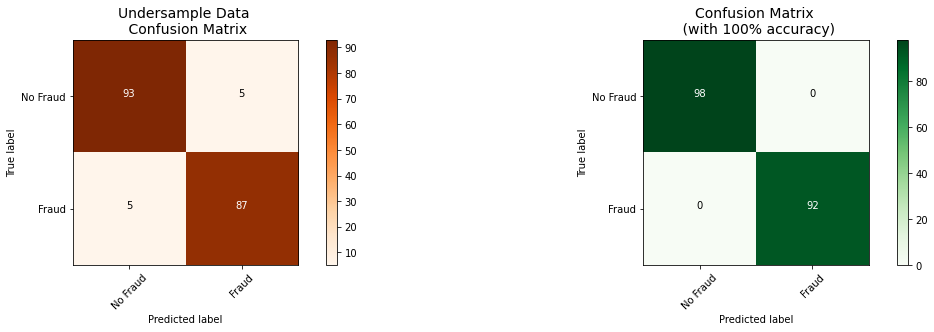

In [8]:
# Plot the confusion matrix
xgb_cm_under = confusion_matrix(y_under_pred,y_test_under)
actual_cm = confusion_matrix(y_test_under, y_test_under)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(xgb_cm_under, labels, title="Undersample Data \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The plot for XGB Under Sampled Data shows good results with 0.94 accuracy score.

In [9]:
# split the oversample dataset.
y_over = df_test_over['Class']
X_over = df_test_over.drop('Class', axis = 1)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, test_size = 0.20, random_state = 42)
# instantiate and train the model
model_over = XGBClassifier()
model_over.fit(X_train_over,y_train_over)
y_over_pred = model_over.predict(X_test_over)

print("\n========= Over Sampled Data Accuracy using using XGBClassifier ==============\n")

print("Accuracy Score ",accuracy_score(y_over_pred,y_test_over))
print ("\n =====Confusion Matrix ======\n")



========= Over Sampled Data Accuracy using using XGBClassifier ==============

Accuracy Score  0.9999296554877513

 =====Confusion Matrix ======



Confusion matrix
[[56738     0]
 [    8 56980]]
Confusion matrix
[[56746     0]
 [    0 56980]]


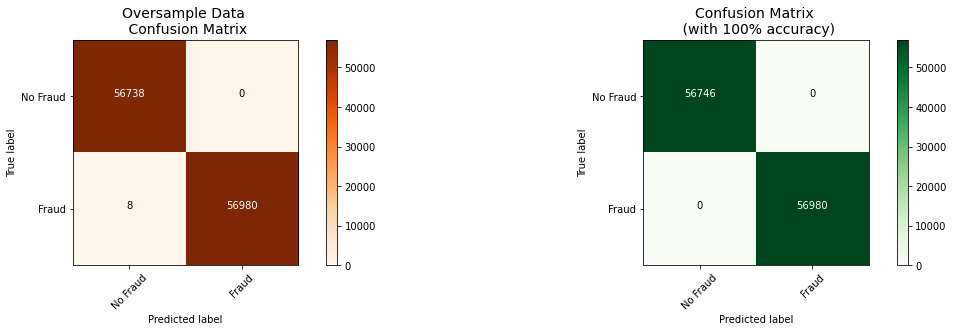

In [10]:
# Plot the confusion matrix
xgb_cm_over = confusion_matrix(y_over_pred, y_test_over)
actual_cm = confusion_matrix(y_test_over, y_test_over)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(xgb_cm_over, labels, title="Oversample Data \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The plot for XGB OverSampled Data shows perfect results with accuracy score of 1.0

In [13]:
# Model saved
filename = "model_under.joblib"
joblib.dump(model_under, filename)

['model_under.joblib']

In [14]:
# Model saved
filename = "model_over.joblib"
joblib.dump(model_over, filename)

['model_over.joblib']